In [2]:
using DataFrames
using CSV
using LinearAlgebra
using Plots

In [1]:
#Q1
function linreg(x, y, lambda)
    m, n = size(x)
    z = x' * x + lambda * Matrix(I, n, n)  # the regularized matrix1
    lin_reg_param = inv(z) * x' * y
    return lin_reg_param
end


linreg (generic function with 1 method)

In [4]:
# Tu Pham
# Questions 2, 3 (linreg)
# Function to calculate predicted responses
function predict(linregparam, x)
    predictedResponses = x * linregparam
    return predictedResponses
end

# Function to calculate R^2
function rsq(predictedResponses, trueResponses, meanPrediction)
    predictiveModelError = 0
    for i in eachindex(trueResponses)
        predictiveModeError += ((trueResponses[i] - predictedResponses[i]) ^ 2)
    end
    baselineModelError = 0
    for i in eachindex(trueResponses)
        baselineModelError += ((trueResponses[i] - meanPrediction) ^ 2)
    end
    r_squared = 1 - (predictiveModelError / baselineModelError)
    return r_squared
end

rsq (generic function with 1 method)

In [5]:
path = "usconsumption.csv"
df = CSV.read(path, DataFrame)

Row,Quarter,Percent Change Consumption,Percent Change Income,Percent Change Production,Percent Change Savings,Change Unemployment
,String7,Float64,Float64,Float64,Float64,Float64
1,1960Q1,0.947824,1.1825,5.85456,3.18329,0.1
2,1960Q2,1.26048,0.625615,-2.19366,-4.81376,0.0
3,1960Q3,-0.400781,0.176703,-1.65811,5.3346,0.1
4,1960Q4,0.126736,-0.0418225,-2.44019,-1.30721,1.1
5,1961Q1,-0.0263901,0.966727,-1.52552,9.2915,0.3
6,1961Q2,1.47763,1.51217,3.88804,2.13531,0.0
7,1961Q3,0.48773,1.31975,3.14082,8.11255,-0.2
8,1961Q4,1.98331,1.91022,3.44642,1.50379,-0.7
9,1962Q1,1.05997,0.952471,1.48278,0.637622,-0.4


In [6]:
path = "usconsumption.csv"
df = CSV.read(path, DataFrame)

Row,Quarter,Percent Change Consumption,Percent Change Income,Percent Change Production,Percent Change Savings,Change Unemployment
,String7,Float64,Float64,Float64,Float64,Float64
1,1960Q1,0.947824,1.1825,5.85456,3.18329,0.1
2,1960Q2,1.26048,0.625615,-2.19366,-4.81376,0.0
3,1960Q3,-0.400781,0.176703,-1.65811,5.3346,0.1
4,1960Q4,0.126736,-0.0418225,-2.44019,-1.30721,1.1
5,1961Q1,-0.0263901,0.966727,-1.52552,9.2915,0.3
6,1961Q2,1.47763,1.51217,3.88804,2.13531,0.0
7,1961Q3,0.48773,1.31975,3.14082,8.11255,-0.2
8,1961Q4,1.98331,1.91022,3.44642,1.50379,-0.7
9,1962Q1,1.05997,0.952471,1.48278,0.637622,-0.4


In [7]:
# Part 2, q123, Minh

# Q1 
filepath = "./usconsumption.csv"
df = CSV.read(filepath, DataFrame)
df[!, :Intercept] = ones(size(df, 1)) # create an Intercept column and fill it with 1s.

print(df)

227×7 DataFrame
 Row │ Quarter   Percent Change Consumption  Percent Change Income   Percent Change Production   Percent Change Savings   Change Unemployment  Intercept 
     │ String7  Float64                      Float64                Float64                     Float64                  Float64               Float64   
─────┼───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ 1960Q1                     0.947824               1.1825                      5.85456                  3.18329                     0.1        1.0
   2 │ 1960Q2                     1.26048                0.625615                   -2.19366                 -4.81376                     0.0        1.0
   3 │ 1960Q3                    -0.400781               0.176703                   -1.65811                  5.3346                      0.1        1.0
   4 │ 1960Q4                     0.126736              -0.0418

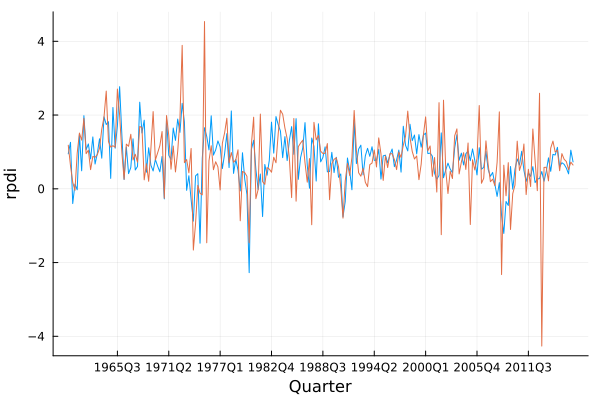

In [8]:
# Q2
x = df[:, "Quarter"]
rpce = df[:, " Percent Change Consumption"]
rpdi = df[:, "Percent Change Income"]

plot(x, rpce, xlabel="Quarter", ylabel="RPCE", legend=false)

# Q3
plot!(x, rpdi, xlabel="Quarter", ylabel="rpdi", legend=false)


In [9]:
# Tu Pham
path = "usconsumption.csv"
df = CSV.read(path, DataFrame)
timeVector = df[:, "Quarter"]
RPCE = df[:, " Percent Change Consumption"]
linregparam = zeros(2, 1) # just placeholder
features = zeros(nrow(df), 2) # just placeholder
estimatedRPCE = predict(linregparam, features)

227×1 Matrix{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

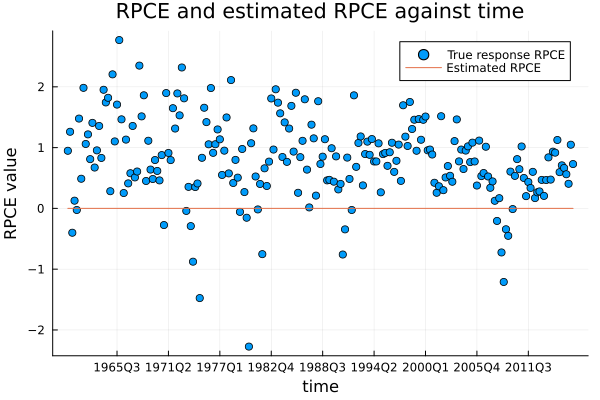

In [10]:
# Tu Pham
# Question 6 (timeseries)
# Plot RPCE and estimated RPCE against time
function plotRPCE(RPCE, estimatedRPCE, timeVector)
    plot(timeVector, RPCE, seriestype=:scatter, label="True response RPCE")
    plot!(timeVector, estimatedRPCE, label="Estimated RPCE")
    xlabel!("time")
    ylabel!("RPCE value")
    title!("RPCE and estimated RPCE against time")
end
plotRPCE(RPCE, estimatedRPCE, timeVector)